In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
import yaml
import os
from copy import deepcopy
import seaborn as sns
import pandas as pd

In [2]:
def loadYaml(filename):

    with open(filename, 'r') as file:
        month_dict = yaml.load(file, Loader=yaml.FullLoader)
    return month_dict

In [3]:
def getCount(target_dict):
    count = 0
    for key in target_dict.keys():
        # Get the count
        # count += target_dict[key]['count']
        
        # Count the amount of titles
        # print(len(target_dict[key]['title']))
        count += len(target_dict[key]['title'])
        
    return count

In [4]:
def getDayCount(month_dict, day):
    return getCount(month_dict[day])

In [5]:
def getOverallCount(month_dict, return_dict=False):
    if return_dict:
        overall_count = {}
        for day in month_dict:
            overall_count[key] = getDayCount(month_dict, day)
        return overall_count
    else:
        overall_count=[]
        for day in month_dict:
            overall_count.append(getDayCount(month_dict, day))
        return overall_count
        

In [6]:
def load_all_data(path):
    data = {}
    for file in os.listdir(path):
        if file.split('.')[-1] == 'yaml':
            print("Loading {0}".format(file))
            data[file.split('_')[0]] = loadYaml(os.path.join(path,file))
    return deepcopy(data)

In [7]:
data = loadYaml("final_data/Jan_AI_2020.yaml")

In [9]:
counts = getOverallCount(data)

In [7]:
data = load_all_data("final_data")

Loading Dez_AI_2020.yaml
Loading Sep_AI_2020.yaml
Loading Mar_AI_2020.yaml
Loading Oct_AI_2020.yaml
Loading Nov_AI_2020.yaml
Loading Jun_AI_2020.yaml
Loading Aug_AI_2020.yaml
Loading Jan_AI_2020.yaml
Loading Feb_AI_2020.yaml
Loading May_AI_2020.yaml
Loading Apr_AI_2020.yaml
Loading Jul_AI_2020.yaml


In [9]:
months = ['Jan', 'Feb', 'Mar','Apr', 'May', 'Jun','Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dez']
data_array = []
counted_data = {}
for month in months:
    data_array.append(getOverallCount(data[month]))
    counted_data[month] = getOverallCount(data[month])

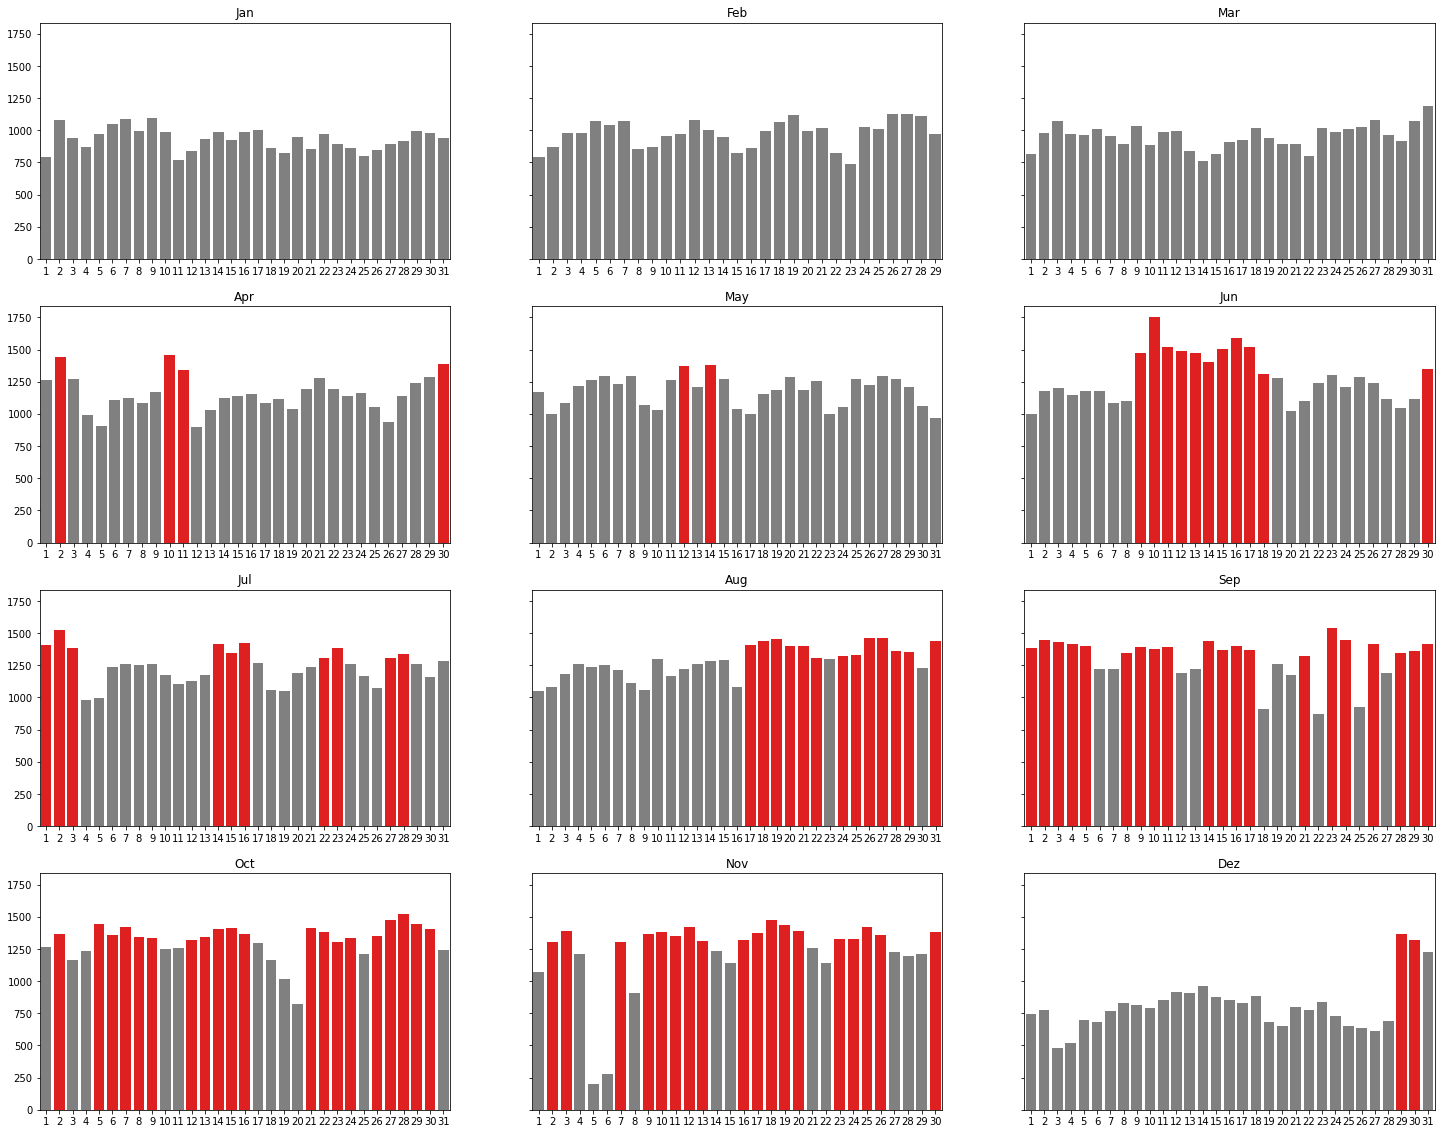

In [34]:
fig,axs = plt.subplots(4,3, figsize=(25,20), sharey=True)
monthcount = 0
for ax in axs:
    #ax[0].bar(np.arange(1,len(data_array[monthcount])+1),height=data_array[monthcount])
    clrs = ['grey' if (x < 1300) else 'red' for x in data_array[monthcount]]
    
    sns.barplot(ax=ax[0],x=np.arange(1,len(data_array[monthcount])+1),y=data_array[monthcount], palette=clrs)
    ax[0].set_title(months[monthcount])
    monthcount += 1
    
    clrs = ['grey' if (x < 1300) else 'red' for x in data_array[monthcount]]
    sns.barplot(ax=ax[1],x=np.arange(1,len(data_array[monthcount])+1),y=data_array[monthcount], palette=clrs)
    ax[1].set_title(months[monthcount])
    monthcount += 1
    
    clrs = ['grey' if (x < 1300) else 'red' for x in data_array[monthcount]]
    sns.barplot(ax=ax[2],x=np.arange(1,len(data_array[monthcount])+1),y=data_array[monthcount], palette=clrs)
    ax[2].set_title(months[monthcount])
    monthcount += 1

plt.savefig("AllMonths-length-sns.png")

# Heatmap

In [92]:
for key in counted_data.keys():
    if len(counted_data[key]) == 30:
        counted_data[key].append(0)
    elif len(counted_data[key]) == 29:
        counted_data[key].append(0)
        counted_data[key].append(0)

In [93]:
pd_months = pd.DataFrame.from_dict(counted_data)

In [96]:
pd_months

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dez
0,790,789,812,1262,1168,998,1411,1052,1384,1262,1074,741
1,1076,867,975,1441,1002,1180,1527,1079,1443,1365,1300,777
2,940,978,1074,1273,1082,1198,1388,1180,1435,1165,1391,482
3,867,981,974,988,1217,1148,979,1261,1416,1235,1213,517
4,971,1073,960,905,1261,1175,994,1233,1403,1446,202,695
5,1052,1042,1006,1110,1291,1176,1238,1255,1223,1357,282,681
6,1088,1068,953,1125,1231,1087,1262,1217,1219,1417,1304,771
7,993,851,894,1083,1297,1098,1250,1111,1342,1346,909,828
8,1092,867,1030,1170,1069,1471,1259,1056,1395,1336,1368,813
9,983,959,887,1455,1031,1749,1178,1296,1378,1250,1384,793


In [94]:
pandas_corr = pd_months.corr()

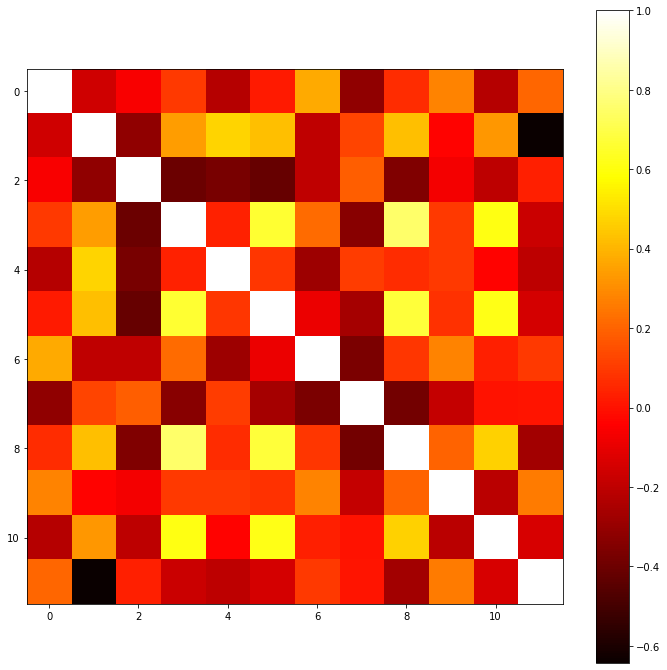

In [98]:
plt.figure(figsize=(12,12))
plt.imshow(pandas_corr,cmap='hot',interpolation="nearest")
plt.colorbar()

# Ranking accoridng to subs

In [40]:
subs = {}
for month in data.keys():
    for day in data[month]:
        for sub in data[month][day]:
            if sub not in subs:
                subs[sub] = len(data[month][day][sub]['title'])
            else:
                subs[sub] += len(data[month][day][sub]['title'])

In [147]:
data_list = np.array(list(subs.items()))
new_data_list = []
for index,entry in enumerate(data_list):
    new_data_list.append([entry[1].astype(np.int64), entry[0]])

In [148]:
sorted_dict = {key: value for key, value in sorted(subs.items(), key=lambda item: item[1])}

In [178]:
top_50 = []
for key in list(sorted_dict.keys())[-10:]:
    top_50.append([key, sorted_dict[key]])

In [180]:
x = np.asarray(top_50)[:,0]
y = np.asarray(top_50)[:,1]

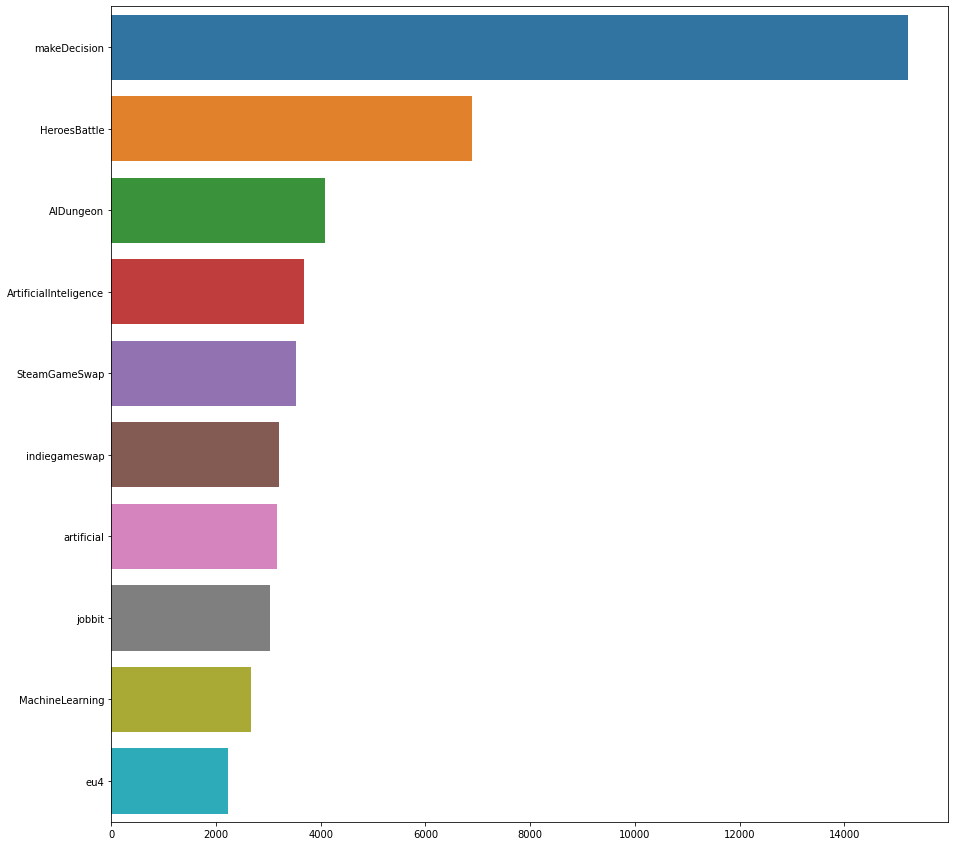

In [181]:
plt.figure(figsize=(15,15))
sns.barplot(x=y[::-1].astype(np.int32),y=x[::-1])
plt.savefig('top10.png')